<a href="https://colab.research.google.com/github/vishva2410/Anomoly-Detection-using-DBscan/blob/main/Used_car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
import xgboost as xg
from sklearn.metrics import accuracy_score,mean_squared_error,r2_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression

In [ ]:
df = pd.read_csv('used_cars.csv')
df.head(10)

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"
5,Acura,ILX 2.4L,2016,"136,397 mi.",Gasoline,2.4 Liter,F,Silver,Ebony.,None reported,NaN,"$14,798"
6,Audi,S3 2.0T Premium Plus,2017,"84,000 mi.",Gasoline,292.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,Blue,Black,None reported,Yes,"$31,000"
7,BMW,740 iL,2001,"242,000 mi.",Gasoline,282.0HP 4.4L 8 Cylinder Engine Gasoline Fuel,A/T,Green,Green,None reported,Yes,"$7,300"
8,Lexus,RC 350 F Sport,2021,"23,436 mi.",Gasoline,311.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,6-Speed A/T,Black,Black,None reported,Yes,"$41,927"
9,Tesla,Model X Long Range Plus,2020,"34,000 mi.",NaN,534.0HP Electric Motor Electric Fuel System,A/T,Black,Black,None reported,Yes,"$69,950"


In [ ]:
df['accident'].replace(np.nan,'None reported',inplace=True)

<ipython-input-9-5aa246dbea22>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['accident'].replace(np.nan,'None reported',inplace=True)


In [ ]:
df['fuel_type'].replace(np.nan,'not_known',inplace=True)

<ipython-input-13-2c4178bf9040>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['fuel_type'].replace(np.nan,'not_known',inplace=True)


In [ ]:
df['clean_title'].replace(np.nan,'No',inplace=True)

<ipython-input-11-2f1469349d28>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['clean_title'].replace(np.nan,'No',inplace=True)


In [ ]:
df.isnull().sum()

,0
brand,0
model,0
model_year,0
milage,0
fuel_type,0
engine,0
transmission,0
ext_col,0
int_col,0
accident,0


In [ ]:
print(df.dtypes)

brand           object
model           object
model_year       int64
milage          object
fuel_type       object
engine          object
transmission    object
ext_col         object
int_col         object
accident        object
clean_title     object
price           object
dtype: object


In [ ]:
x = df.drop('price',axis = 1)
y = df['price']

In [ ]:
df.head(3)

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,No,"$54,598"


In [ ]:
te  = TfidfVectorizer()
'''
x['accident'] = te.fit_transform(x['accident']).toarray()
x['fuel_type'] = te.fit_transform(x['fuel_type']).toarray()
x['clean_title'] = te.fit_transform(x['clean_title']).toarray()
x['engine']= te.fit_transform(x['engine']).toarray()
x['transmission']= te.fit_transform(x['transmission']).toarray()
x['model']= te.fit_transform(x['model']).toarray()
'''
# done exicuting
x['model']= te.fit_transform(x['model']).toarray()

In [ ]:
x["milage"] = x["milage"].str.replace(",", "").str.replace("mi.", "").str.strip().astype(int)

In [ ]:
le = LabelEncoder()
x['brand']= le.fit_transform(x['brand'])

In [ ]:
x['ext_col'] = le.fit_transform(x['ext_col'])
x['int_col'] = le.fit_transform(x['int_col'])
x['clean_title'] = le.fit_transform(x['clean_title'])

In [ ]:
y = y.str.replace(",", "").str.replace("$", "").str.strip().astype(int)

In [ ]:
y

,price
0,10300
1,38005
2,54598
3,15500
4,34999
...,...
4004,349950
4005,53900
4006,90998
4007,62999


In [ ]:
se = StandardScaler()
x= se.fit_transform(x)
y = se.fit_transform(y.values.reshape(-1,1))

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=32)

Model LinearRegression():
Mean Squared Error: 0.4022068816284052
R-squared: 0.18376934600394523


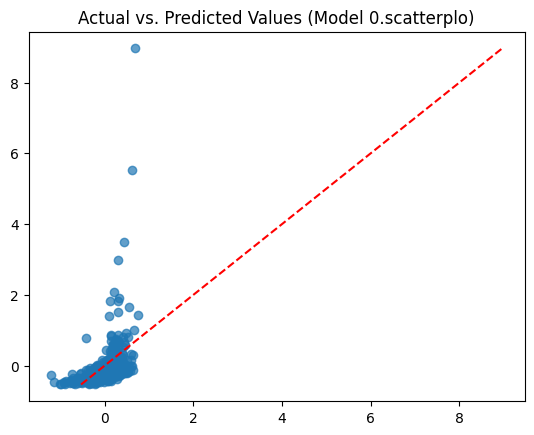

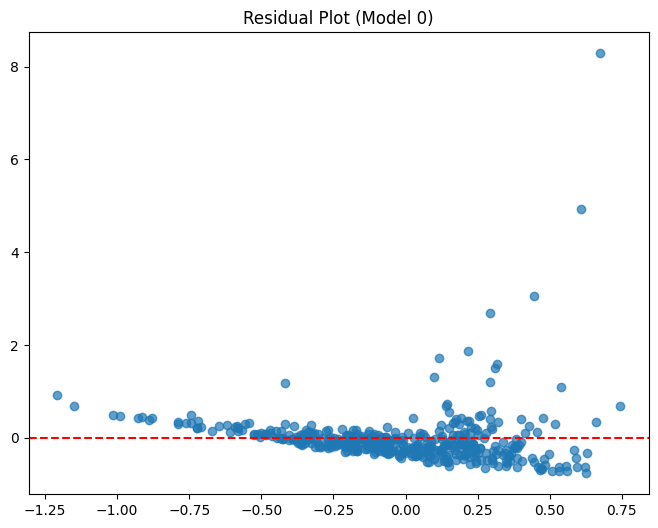

Model XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...):
Mean Squared Error: 0.13248988974356748
R-squared: 0.7311276502395381


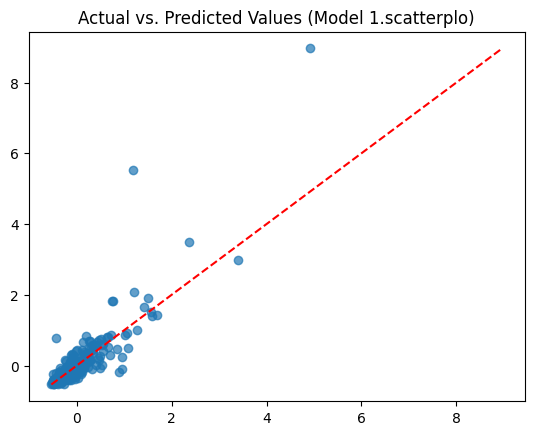

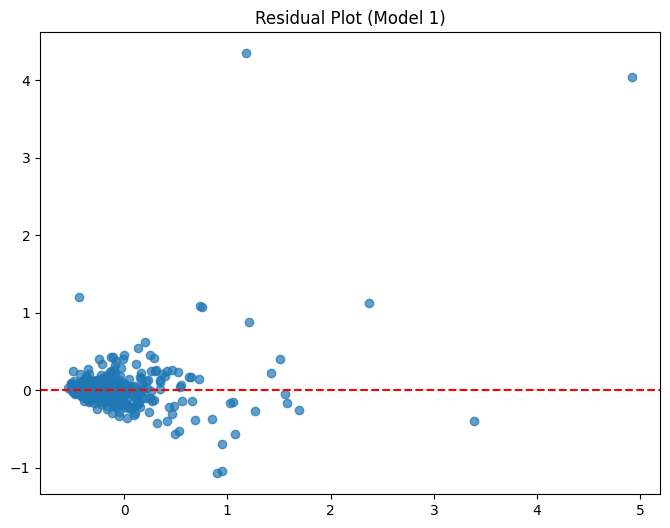

In [ ]:
model = [LinearRegression(),xg.XGBRegressor()]
for i in range(2):
  model[i].fit(x_train,y_train)
  y_pred = model[i].predict(x_test)
  # Reshape y_pred to be (401, 1) to match y_test
  y_pred = y_pred.reshape(-1, 1)
  mse = mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)
  print(f"Model {model[i]}:")
  print(f"Mean Squared Error: {mse}")
  print(f"R-squared: {r2}")
  '''
  plt.figure(figsize=(8, 6))
  plt.scatter(y_test, y_pred, alpha=0.7)
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Diagonal line
  plt.xlabel("Actual Values")
  plt.ylabel("Predicted Values")
  '''
  plt.scatter(y_pred, y_test, alpha=0.7)
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
  plt.title(f"Actual vs. Predicted Values (Model {i}.scatterplo)")
  plt.show()

  residuals = y_test - y_pred
  plt.figure(figsize=(8, 6))
  # Use y_pred.ravel() to flatten it for scatter plot.
  plt.scatter(y_pred.ravel(), residuals.ravel(), alpha=0.7)
  plt.axhline(y=0, color='red', linestyle='--')
  plt.title(f"Residual Plot (Model {i})")
  plt.show()

<>:31: SyntaxWarning: invalid escape sequence '\$'
<>:31: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipython-input-4248826107.py:31: SyntaxWarning: invalid escape sequence '\$'
  df['price'] = df['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)


Dataset loaded successfully.

First 5 rows of the dataset:
      brand                            model  model_year      milage  \
0      Ford  Utility Police Interceptor Base        2013  51,000 mi.   
1   Hyundai                     Palisade SEL        2021  34,742 mi.   
2     Lexus                    RX 350 RX 350        2022  22,372 mi.   
3  INFINITI                 Q50 Hybrid Sport        2015  88,900 mi.   
4      Audi        Q3 45 S line Premium Plus        2021   9,835 mi.   

       fuel_type                                             engine  \
0  E85 Flex Fuel  300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...   
1       Gasoline                               3.8L V6 24V GDI DOHC   
2       Gasoline                                     3.5 Liter DOHC   
3         Hybrid  354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...   
4       Gasoline                         2.0L I4 16V GDI DOHC Turbo   

        transmission                 ext_col int_col  \
0        6-Speed A/T     

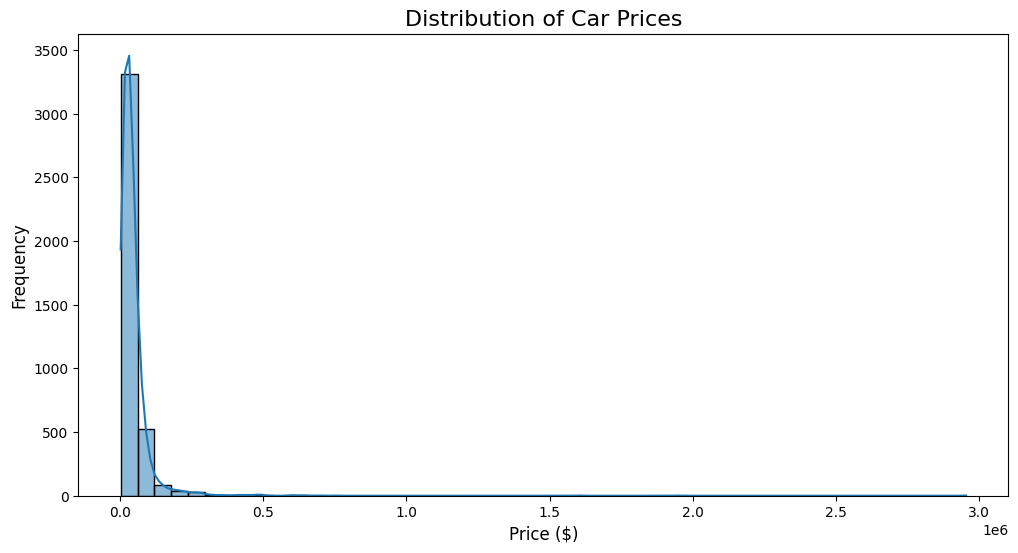

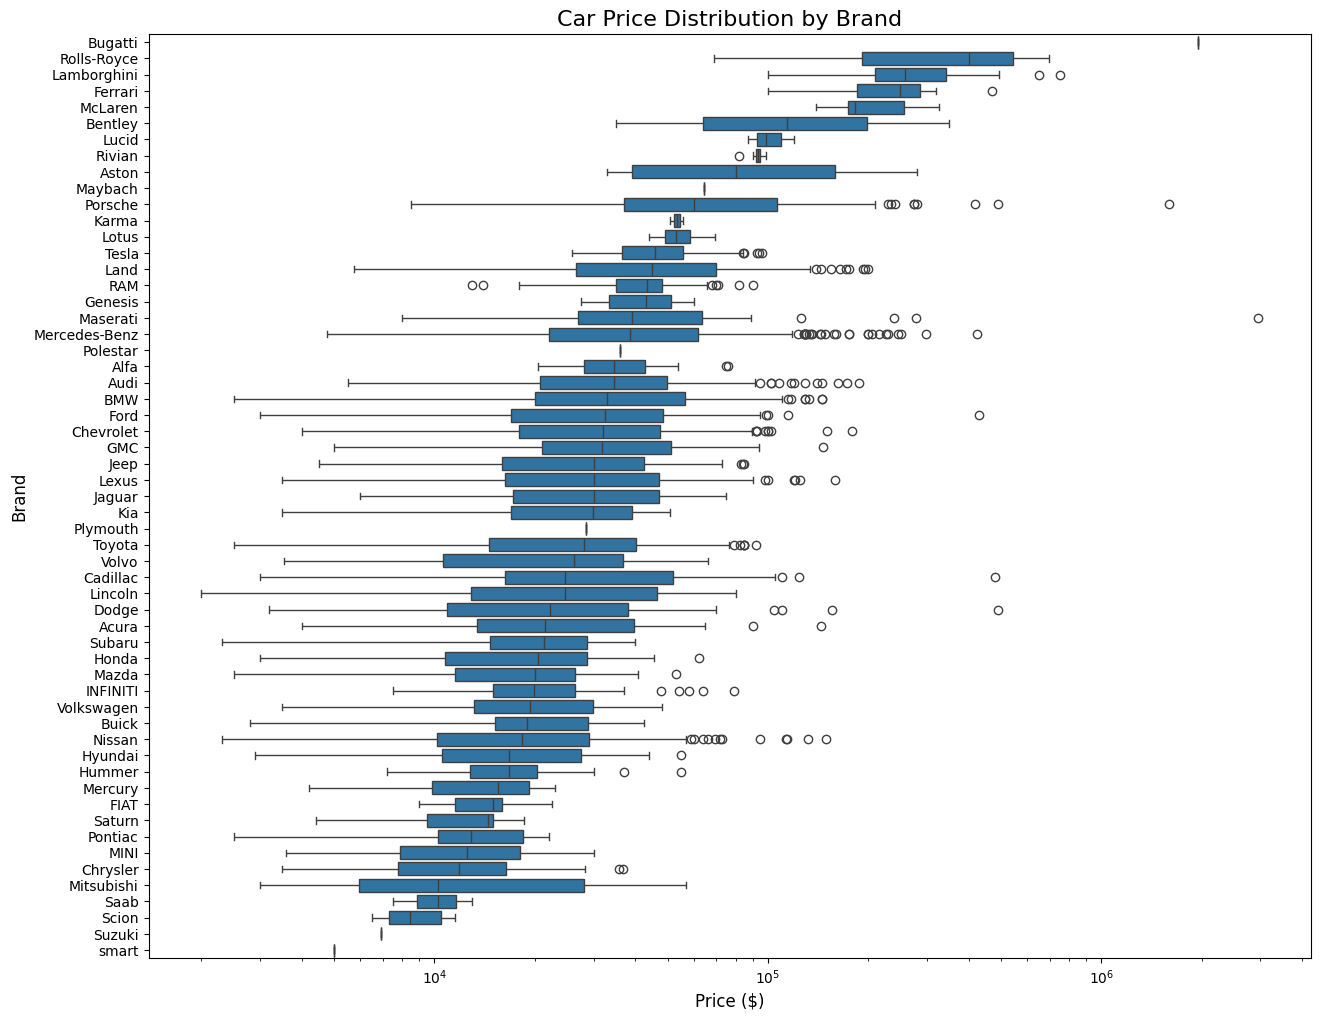

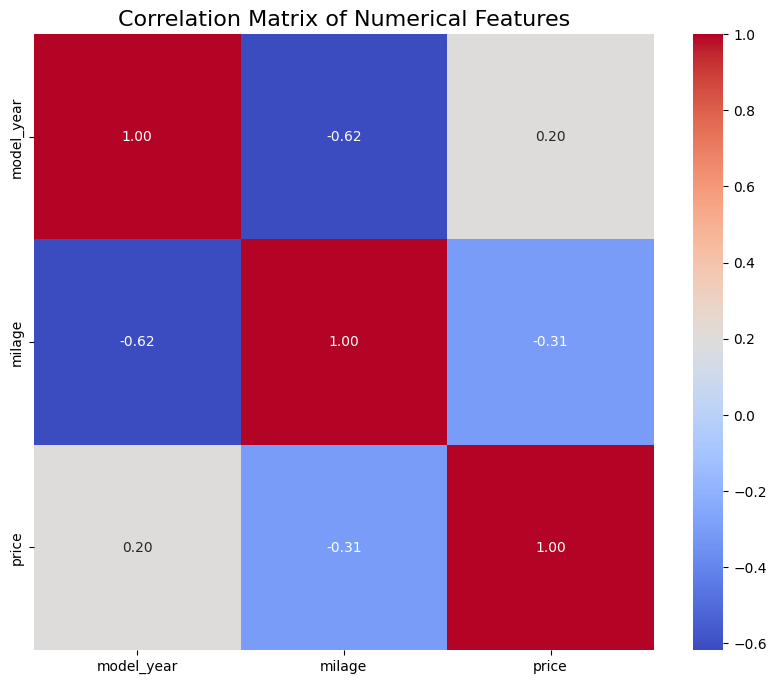

/tmp/ipython-input-4248826107.py:65: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['accident'].fillna('None reported', inplace=True)
/tmp/ipython-input-4248826107.py:66: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 


Categorical Features: ['brand', 'fuel_type', 'transmission', 'ext_col', 'int_col', 'accident', 'clean_title']
Numerical Features: ['model_year', 'milage', 'horsepower']
--- Linear Regression ---
RMSE: $136,619.34
R2 Score: 0.0868
Mean Absolute Error: $23,250.88

--- Random Forest ---
RMSE: $132,639.76
R2 Score: 0.1393
Mean Absolute Error: $17,593.73

--- Gradient Boosting ---
RMSE: $134,511.94
R2 Score: 0.1148
Mean Absolute Error: $20,261.90

--- XGBoost ---
RMSE: $134,459.06
R2 Score: 0.1155
Mean Absolute Error: $18,441.23


--- Model Comparison ---
                            RMSE  R2 Score           MAE
Random Forest      132639.755542  0.139253  17593.728204
XGBoost            134459.055369  0.115479  18441.232921
Gradient Boosting  134511.940493  0.114783  20261.895961
Linear Regression  136619.343733  0.086828  23250.880656

--- Hyperparameter Tuning for XGBoost ---
Fitting 3 folds for each of 16 candidates, totalling 48 fits


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# --- 1. Load the Dataset ---
try:
    df = pd.read_csv('used_cars.csv')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: 'used_cars.csv' not found. Please make sure the file is in the correct directory.")
    exit()

print("\nFirst 5 rows of the dataset:")
print(df.head())


# --- 2. Exploratory Data Analysis (EDA) & Initial Cleaning ---
print("\nDataset Info:")
df.info()

# Clean 'price' and 'milage' columns for numerical analysis
df['price'] = df['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)
df['milage'] = df['milage'].str.replace(',', '').str.replace(' mi.', '').str.strip().astype(float)

print("\nStatistical Summary of Numerical Features:")
print(df.describe())

# Visualize the distribution of the target variable (price)
plt.figure(figsize=(12, 6))
sns.histplot(df['price'], kde=True, bins=50)
plt.title('Distribution of Car Prices', fontsize=16)
plt.xlabel('Price ($)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

# Visualize the relationship between brand and price
plt.figure(figsize=(15, 12))
brand_order = df.groupby('brand')['price'].median().sort_values(ascending=False).index
sns.boxplot(y='brand', x='price', data=df, order=brand_order)
plt.title('Car Price Distribution by Brand', fontsize=16)
plt.xlabel('Price ($)', fontsize=12)
plt.ylabel('Brand', fontsize=12)
plt.xscale('log') # Use a log scale for better visualization of price spread
plt.show()

# Correlation heatmap for numerical features
numerical_features_for_corr = df.select_dtypes(include=np.number)
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_features_for_corr.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.show()


# --- 3. Data Preprocessing and Feature Engineering ---
# Handle missing values
df['accident'].fillna('None reported', inplace=True)
df['clean_title'].fillna('No', inplace=True)
df['fuel_type'].replace('–', np.nan, inplace=True)
df['fuel_type'].fillna('not_known', inplace=True)

# Feature Engineering: Extract Horsepower from 'engine'
df['horsepower'] = df['engine'].str.extract(r'(\d+\.?\d*)\s*HP').astype(float)
df['horsepower'].fillna(df['horsepower'].median(), inplace=True)

# Drop the original 'engine' column and other less useful columns like 'model'
df.drop(['engine', 'model'], axis=1, inplace=True)

# Define Features (X) and Target (y)
X = df.drop('price', axis=1)
y = df['price']

# Identify categorical and numerical features for the pipeline
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(include=np.number).columns

print("\nCategorical Features:", list(categorical_features))
print("Numerical Features:", list(numerical_features))


# --- 4. Building the Preprocessing Pipeline ---
# Pipeline for numerical features: Scale the data
numerical_transformer = StandardScaler()

# Pipeline for categorical features: One-hot encode the data
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine preprocessing steps with a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'
)


# --- 5. Model Training and Evaluation ---
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the models to be evaluated
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    # Create the full pipeline
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('regressor', model)])
    # Train
    pipeline.fit(X_train, y_train)
    # Predict
    y_pred = pipeline.predict(X_test)
    # Evaluate
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    results[name] = {'RMSE': rmse, 'R2 Score': r2, 'MAE': mae}

    print(f"--- {name} ---")
    print(f"RMSE: ${rmse:,.2f}")
    print(f"R2 Score: {r2:.4f}")
    print(f"Mean Absolute Error: ${mae:,.2f}\n")

# Display results in a DataFrame for easy comparison
results_df = pd.DataFrame(results).T
print("\n--- Model Comparison ---")
print(results_df.sort_values(by='R2 Score', ascending=False))


# --- 6. Hyperparameter Tuning (for the best model) ---
print("\n--- Hyperparameter Tuning for XGBoost ---")
# Using XGBoost as it's often a top performer
best_model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                     ('regressor', xgb.XGBRegressor(objective='reg:squarederror', random_state=42))])

# Define a parameter grid for GridSearchCV
param_grid = {
    'regressor__n_estimators': [200, 300],
    'regressor__learning_rate': [0.1, 0.2],
    'regressor__max_depth': [5, 7],
    'regressor__colsample_bytree': [0.8, 1.0]
}

# Create and fit the GridSearchCV object
grid_search = GridSearchCV(best_model_pipeline, param_grid, cv=3, scoring='r2', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

print("\nBest Hyperparameters for XGBoost:")
print(grid_search.best_params_)

# Evaluate the best model from the grid search
best_tuned_model = grid_search.best_estimator_
y_pred_best = best_tuned_model.predict(X_test)
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))
r2_best = r2_score(y_test, y_pred_best)
mae_best = mean_absolute_error(y_test, y_pred_best)

print("\n--- Performance of Tuned XGBoost Model ---")
print(f"RMSE: ${rmse_best:,.2f}")
print(f"R2 Score: {r2_best:.4f}")
print(f"Mean Absolute Error: ${mae_best:,.2f}")


# --- 7. Feature Importance Visualization ---
# Extract feature names from the preprocessor
ohe_feature_names = best_tuned_model.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features)
all_feature_names = np.concatenate([numerical_features, ohe_feature_names])

# Get feature importances from the tuned XGBoost model
importances = best_tuned_model.named_steps['regressor'].feature_importances_
feature_importance_df = pd.DataFrame({'feature': all_feature_names, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False).head(20)

# Plot the most important features
plt.figure(figsize=(12, 10))
sns.barplot(x='importance', y='feature', data=feature_importance_df, palette='viridis')
plt.title('Top 20 Feature Importances from Tuned XGBoost Model', fontsize=16)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.show()